# W2 - part 1: Comorbidities Analysis : Gender and Age

In [1]:
# Add all of your import statements here
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)




### Setup, Cleaning, Organizing, and Exploring the Data

In [2]:
#read in the data
df_G19_analysis = pd.read_csv('G19_analysis.csv')
#drop the NAs
#df = df.dropna()
#show the head
df_G19_analysis.head()

,Comorbidities,Total,Male-Total,M_0-14,M_15-24,M_25-34,M_35-44,M_45-54,M_55-64,M_65-74,...,Female-total,F_0-14,F_15-24,F_25-34,F_35-44,F_45-54,F_55-64,F_65-74,F_75-84,F_85
0,Arthritis,"5,18,641","1,83,276",410,"1,255","4,859","9,836","20,218","38,927","52,812",...,"3,35,365",447,"2,041","6,777","14,795","35,893","69,851","94,887","73,573","37,101"
1,Asthma,"5,43,047","2,44,002","45,210","33,478","38,793","36,650","29,228","24,778","20,611",...,"2,99,045","29,239","33,855","48,672","45,483","41,617","38,055","34,529","19,959","7,636"
2,Cancer,"1,79,304","85,362",618,758,"1,719","3,080","6,378","15,458","27,387",...,"93,942",478,667,"2,030","5,210","12,221","20,493","26,255","18,593","7,995"
3,Dementia,"45,947","18,233",53,63,87,117,309,886,"2,905",...,"27,714",32,50,80,91,265,789,"2,952","9,122","14,333"
4,Diabetes,"3,03,361","1,65,058",935,"2,023","4,321","11,456","22,126","37,502","47,511",...,"1,38,303",855,"1,921","4,707","9,459","17,257","29,261","37,077","26,577","11,189"


In [3]:
# setting first name as index column
df = df_G19_analysis.set_index("Comorbidities")

In [4]:
cols = df.columns

In [5]:
# Removing commas
df[cols] = df[cols].replace({'\$': '', ',': ''}, regex=True)

In [6]:
df

,Total,Male-Total,M_0-14,M_15-24,M_25-34,M_35-44,M_45-54,M_55-64,M_65-74,M_75-84,...,Female-total,F_0-14,F_15-24,F_25-34,F_35-44,F_45-54,F_55-64,F_65-74,F_75-84,F_85
Comorbidities,,,,,,,,,,,,,,,,,,,,,
Arthritis,518641,183276,410,1255,4859,9836,20218,38927,52812,39517,...,335365,447,2041,6777,14795,35893,69851,94887,73573,37101
Asthma,543047,244002,45210,33478,38793,36650,29228,24778,20611,11553,...,299045,29239,33855,48672,45483,41617,38055,34529,19959,7636
Cancer,179304,85362,618,758,1719,3080,6378,15458,27387,22150,...,93942,478,667,2030,5210,12221,20493,26255,18593,7995
Dementia,45947,18233,53,63,87,117,309,886,2905,7107,...,27714,32,50,80,91,265,789,2952,9122,14333
Diabetes,303361,165058,935,2023,4321,11456,22126,37502,47511,30424,...,138303,855,1921,4707,9459,17257,29261,37077,26577,11189
Heartdisease,243140,147202,1198,930,1582,3686,11224,28244,46628,37926,...,95938,895,830,1503,2287,5641,13412,24863,27180,19327
KidneyDisease,57439,29516,783,547,963,1585,2681,4705,7426,7257,...,27923,463,520,1098,1680,2669,4133,6009,6639,4712
LungCondition,97268,46888,613,463,832,1486,3538,8685,14195,12297,...,50380,479,394,781,1586,4402,9677,15113,12375,5573
MentalHealthCcondition,571147,218697,12163,27959,39367,36857,35985,31057,20742,10140,...,352450,10940,54335,71535,57757,54270,46425,29637,16102,11449


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Arthritis  to NotStated
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Total         13 non-null     object
 1   Male-Total    13 non-null     object
 2   M_0-14        13 non-null     object
 3   M_15-24       13 non-null     object
 4   M_25-34       13 non-null     object
 5   M_35-44       13 non-null     object
 6   M_45-54       13 non-null     object
 7   M_55-64       13 non-null     object
 8   M_65-74       13 non-null     object
 9   M_75-84       13 non-null     object
 10  M_85          13 non-null     object
 11  Female-total  13 non-null     object
 12  F_0-14        13 non-null     object
 13  F_15-24       13 non-null     object
 14  F_25-34       13 non-null     object
 15  F_35-44       13 non-null     object
 16  F_45-54       13 non-null     object
 17  F_55-64       13 non-null     object
 18  F_65-74       13 non-null     object
 19 

In [8]:
#Changing the categorical to numeric 

df[cols] = df[cols].astype('int64')

### Distribution of data 

In [9]:
df.describe()

,Total,Male-Total,M_0-14,M_15-24,M_25-34,M_35-44,M_45-54,M_55-64,M_65-74,M_75-84,...,Female-total,F_0-14,F_15-24,F_25-34,F_35-44,F_45-54,F_55-64,F_65-74,F_75-84,F_85
count,1.300000e+01,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,5.846496e+05,2.817524e+05,47020.230769,31573.000000,38730.384615,36941.307692,34398.538462,34070.153846,31351.461538,19990.692308,...,3.028972e+05,44279.076923,30779.000000,41157.461538,39477.076923,38217.230769,38105.692308,34912.461538,23278.846154,12690.384615
std,1.037524e+06,5.279952e+05,129825.766606,79340.959832,94802.046709,84424.782286,65757.642624,46248.693583,27088.621832,12802.033858,...,5.114372e+05,128670.848299,69602.498797,88942.960002,81800.778403,65241.359318,48400.714649,32948.862493,18273.171294,8660.545629
min,4.594700e+04,1.823300e+04,53.000000,63.000000,87.000000,117.000000,309.000000,886.000000,2905.000000,7107.000000,...,2.732800e+04,32.000000,50.000000,80.000000,91.000000,265.000000,789.000000,2952.000000,6639.000000,4712.000000
25%,9.726800e+04,4.688800e+04,613.000000,547.000000,963.000000,1585.000000,3538.000000,8685.000000,14195.000000,10140.000000,...,5.038000e+04,463.000000,520.000000,1098.000000,1680.000000,4402.000000,9677.000000,15113.000000,12375.000000,7636.000000
50%,3.033610e+05,1.650580e+05,935.000000,1255.000000,4321.000000,9836.000000,20218.000000,27614.000000,20742.000000,12355.000000,...,1.383030e+05,855.000000,1921.000000,4707.000000,9459.000000,17257.000000,25934.000000,26255.000000,18593.000000,11189.000000
75%,5.190960e+05,2.236910e+05,27334.000000,27959.000000,38793.000000,35388.000000,31520.000000,37502.000000,46628.000000,30424.000000,...,2.990450e+05,17680.000000,28441.000000,35234.000000,37953.000000,41617.000000,46425.000000,37077.000000,27180.000000,14333.000000
max,3.969509e+06,2.015364e+06,475292.000000,291879.000000,349558.000000,313704.000000,248948.000000,181249.000000,104260.000000,40527.000000,...,1.954145e+06,470046.000000,255064.000000,326967.000000,303869.000000,246497.000000,183822.000000,111702.000000,73573.000000,37101.000000


#### Gaussian/normal distribution of Total Comorbidities

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



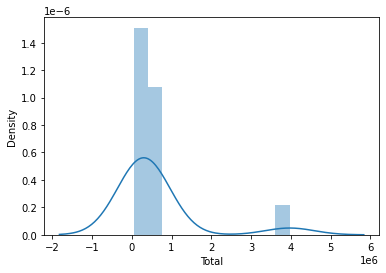

In [10]:
sns.distplot(df['Total'])

## Gender wise Comorbidities

### Gaussian/normal distribution of Male Comorbidities

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



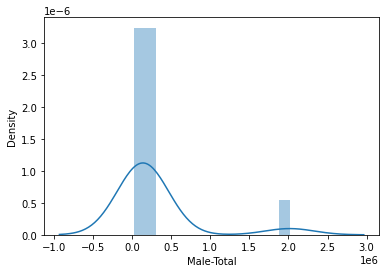

In [11]:
sns.distplot(df['Male-Total'])

### Gaussian/normal distribution of Female Comorbidities

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



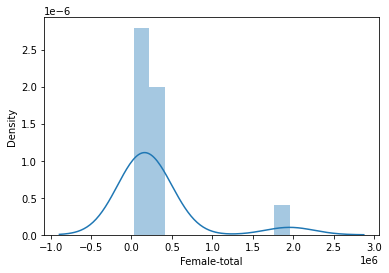

In [12]:
sns.distplot(df['Female-total'])

### Distribution of Comorbidities(Health-condition) across total population

#### Bar plot

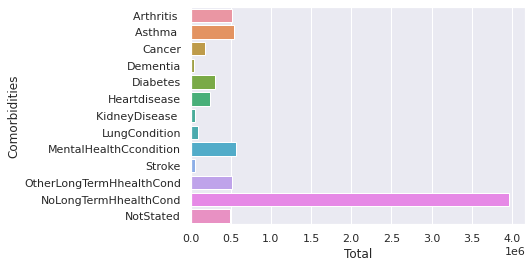

In [13]:
import seaborn as sns
sns.set()
sns.barplot(
    x = "Total",
    y = df.index,
    data = df)



### Distribution of Comorbidities(Health-condition) in Male and Female population

#### Bar plot

In [14]:
#Selecting dataset
df.loc[:, ['Total', 'Male-Total','Female-total']]

,Total,Male-Total,Female-total
Comorbidities,,,
Arthritis,518641,183276,335365
Asthma,543047,244002,299045
Cancer,179304,85362,93942
Dementia,45947,18233,27714
Diabetes,303361,165058,138303
Heartdisease,243140,147202,95938
KidneyDisease,57439,29516,27923
LungCondition,97268,46888,50380
MentalHealthCcondition,571147,218697,352450


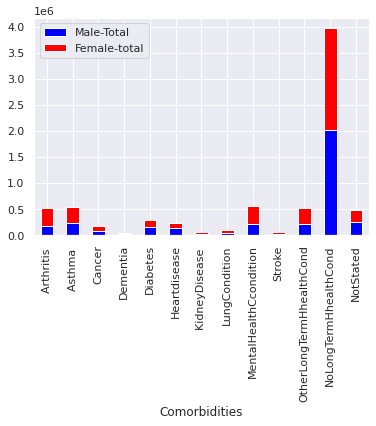

In [15]:
#Visualization of distribution
df.loc[:, ['Male-Total','Female-total']].plot(kind='bar', stacked=True, color=['blue', 'red'])

### Distribution of Comorbidities(Health-condition) in Male and Female population

#### Scatter plot

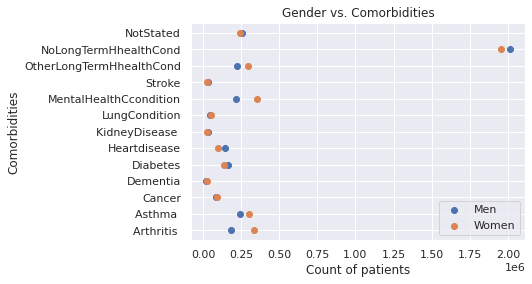

In [16]:
plt.title("Gender vs. Comorbidities")
plt.xlabel("Count of patients")
plt.ylabel("Comorbidities")
plt.scatter(df['Male-Total'], df.index, label="Men")
plt.scatter(df['Female-total'], df.index, label="Women")
plt.legend(loc='lower right')

## Distribution of Comorbidities(Health-condition) in various age groups

#### Bar plot

In [17]:
#Reading dataset
df_comorbidities_age_orig = pd.read_csv('comorbidities_age_analysis.csv')

# setting Comorbidities  as index column
df_comorbidities_age = df_comorbidities_age_orig.set_index("Comorbidities")
df_comorbidities_age

,0-14,15-24,25-34,35-44,45-54,55-64,65-74,75-84,85 years,Total
Comorbidities,,,,,,,,,,
Arthritis,858,"3,293","11,637","24,624","56,107","1,08,774","1,47,703","1,13,084","52,545","5,18,625"
Asthma,"74,452","67,333","87,461","82,130","70,847","62,836","55,144","31,506","11,336","5,43,045"
Cancer,"1,096","1,432","3,755","8,297","18,603","35,952","53,641","40,743","15,812","1,79,331"
Dementia,80,113,164,205,572,"1,679","5,857","16,232","21,041","45,943"
Diabetes,"1,785","3,941","9,034","20,919","39,381","66,764","84,590","56,999","19,955","3,03,368"
Heartdisease,"2,089","1,753","3,086","5,969","16,861","41,654","71,480","65,103","35,116","2,43,111"
KidneyDisease,"1,246","1,069","2,063","3,272","5,344","8,833","13,440","13,897","8,286","57,450"
LungCondition,"1,092",854,"1,619","3,076","7,940","18,364","29,306","24,675","10,352","97,278"
MentalHealthCcondition,"23,107","82,294","1,10,898","94,621","90,254","77,478","50,386","26,240","15,871","5,71,149"


In [18]:
#Changing the categorical to numeric
cols_age = df_comorbidities_age.columns
df_comorbidities_age[cols_age] = df_comorbidities_age[cols_age].replace({'\$': '', ',': ''}, regex=True)
df_comorbidities_age[cols_age] = df_comorbidities_age[cols_age].astype('int64')

In [19]:
df_comorbidities_age.columns

Index(['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85 years', 'Total'],
      dtype='object')

In [20]:
df_comorbidities_age.describe()

,0-14,15-24,25-34,35-44,45-54,55-64,65-74,75-84,85 years,Total
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01
mean,91299.076923,62351.692308,79888.615385,76419.153846,72615.615385,72176.076923,66265.461538,43268.538462,20367.615385,5.846518e+05
std,258453.846657,148680.504949,183427.385398,166063.005761,130743.498721,93963.475327,58482.112818,29707.317170,12280.863077,1.037520e+06
min,80.000000,113.000000,164.000000,205.000000,572.000000,1679.000000,5857.000000,13897.000000,8286.000000,4.594300e+04
25%,1092.000000,1069.000000,2063.000000,3272.000000,7940.000000,18364.000000,29306.000000,24675.000000,11336.000000,9.727800e+04
50%,1785.000000,3293.000000,9034.000000,20919.000000,39381.000000,53548.000000,53641.000000,31506.000000,15871.000000,3.033680e+05
75%,45011.000000,60985.000000,75553.000000,67444.000000,70847.000000,77478.000000,76926.000000,56999.000000,22486.000000,5.191080e+05
max,945340.000000,546938.000000,676524.000000,617573.000000,495448.000000,365070.000000,215966.000000,113084.000000,52545.000000,3.969500e+06


Text(0.5, 1.0, 'Distribution of Comorbidities in various age groups')

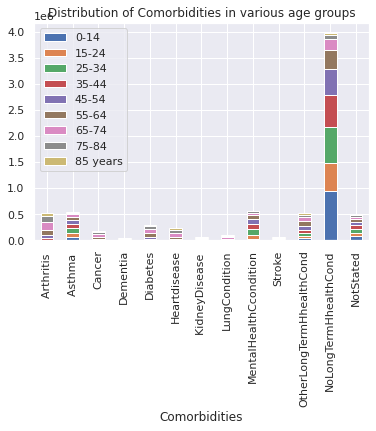

In [21]:
#Visualization of distribution using Barplot
df_comorbidities_age.loc[:, ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85 years']].plot(kind='bar', stacked=True)
plt.legend(loc='upper left')
plt.title("Distribution of Comorbidities in various age groups")


### Let's remove the population with "No long-term health condition" to get better distribution with comorbidities

In [22]:
update_df_comorbidities_age = df_comorbidities_age.drop('NoLongTermHhealthCond')

Text(0.5, 1.0, 'Distribution of Comorbidities in various age groups')

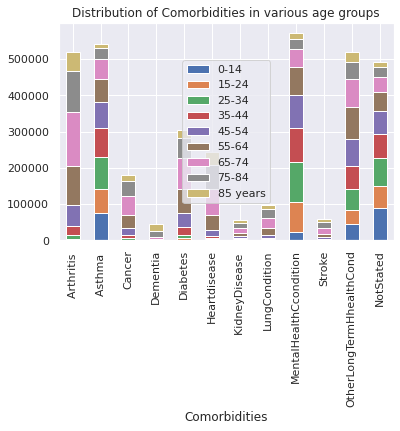

In [23]:
#df_comorbities_gender = df['Total', 'Male-Total', 'Female-Total']
update_df_comorbidities_age.loc[:, ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85 years']].plot(kind='bar', stacked=True)

plt.legend(loc='center')
plt.title("Distribution of Comorbidities in various age groups")
#, color=['blue', 'red']

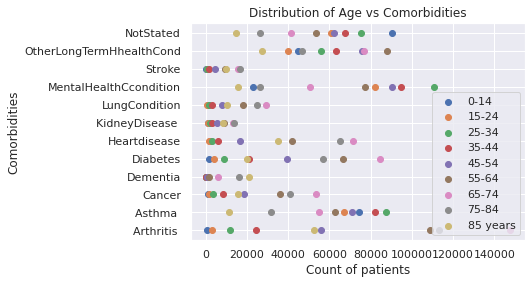

In [24]:
plt.title("Distribution of Age vs Comorbidities")
plt.xlabel("Count of patients")
plt.ylabel("Comorbidities")
plt.scatter(update_df_comorbidities_age['0-14'], update_df_comorbidities_age.index, label="0-14")
plt.scatter(update_df_comorbidities_age['15-24'], update_df_comorbidities_age.index, label="15-24")
plt.scatter(update_df_comorbidities_age['25-34'], update_df_comorbidities_age.index, label="25-34")
plt.scatter(update_df_comorbidities_age['35-44'], update_df_comorbidities_age.index, label="35-44")
plt.scatter(update_df_comorbidities_age['45-54'], update_df_comorbidities_age.index, label="45-54")
plt.scatter(update_df_comorbidities_age['55-64'], update_df_comorbidities_age.index, label="55-64")

plt.scatter(update_df_comorbidities_age['65-74'], update_df_comorbidities_age.index, label="65-74")
plt.scatter(update_df_comorbidities_age['75-84'], update_df_comorbidities_age.index, label="75-84")
plt.scatter(update_df_comorbidities_age['85 years'], update_df_comorbidities_age.index, label="85 years")
plt.legend(loc='lower right')

### Statistical Distribution of Comorbidities with various Age groups

In [25]:
df_comorbidities_stat = pd.read_csv('comorbidities_stat.csv')
# setting Comorbidities  as index column
df_comorbidities_stat.set_index("age", inplace = True)
df_comorbidities_stat

,Arthritis,Asthma,Cancer,Dementia,Diabetes,HeartDisease,KidneyDisease,LungCondition,MentalHealthCondition,Stroke,otherLongTermHealthCond,NoLongTermHealthCond,NotStated,Age-Total
age,,,,,,,,,,,,,,
0-14,858,"74,452","1,096",80,"1,785","2,089","1,246","1,092","23,107",403,"45,011","9,45,340","90,329","11,69,456"
15-24,"3,293","67,333","1,432",113,"3,941","1,753","1,069",854,"82,294",426,"40,141","5,46,938","60,985","7,73,536"
25-34,"11,637","87,461","3,755",164,"9,034","3,086","2,063","1,619","1,10,898",841,"55,917","6,76,524","75,553","9,75,493"
35-44,"24,624","82,130","8,297",205,"20,919","5,969","3,272","3,076","94,621","1,869","63,450","6,17,573","67,444","9,18,738"
45-54,"56,107","70,847","18,603",572,"39,381","16,861","5,344","7,940","90,254","4,757","75,706","4,95,448","62,183","8,26,885"
55-64,"1,08,774","62,836","35,952","1,679","66,764","41,654","8,833","18,364","77,478","9,268","88,069","3,65,070","53,548","7,46,547"
65-74,"1,47,703","55,144","53,641","5,857","84,590","71,480","13,440","29,306","50,386","15,652","76,926","2,15,966","41,360","6,05,557"
75-84,"1,13,084","31,506","40,743","16,232","56,999","65,103","13,897","24,675","26,240","16,613","46,775","84,155","26,469","3,44,801"
85 years,"52,545","11,336","15,812","21,041","19,955","35,116","8,286","10,352","15,871","10,026","27,113","22,486","14,840","1,42,475"


In [26]:
#Changing the categorical to numeric
cols_stat = df_comorbidities_stat.columns
df_comorbidities_stat[cols_stat] = df_comorbidities_stat[cols_stat].replace({'\$': '', ',': ''}, regex=True)
df_comorbidities_stat[cols_stat] = df_comorbidities_stat[cols_stat].astype('int64')

In [27]:
print(df_comorbidities_stat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0-14  to 85 years
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Arthritis                9 non-null      int64
 1   Asthma                   9 non-null      int64
 2   Cancer                   9 non-null      int64
 3   Dementia                 9 non-null      int64
 4   Diabetes                 9 non-null      int64
 5   HeartDisease             9 non-null      int64
 6   KidneyDisease            9 non-null      int64
 7   LungCondition            9 non-null      int64
 8   MentalHealthCondition    9 non-null      int64
 9   Stroke                   9 non-null      int64
 10  otherLongTermHealthCond  9 non-null      int64
 11  NoLongTermHealthCond     9 non-null      int64
 12  NotStated                9 non-null      int64
 13  Age-Total                9 non-null      int64
dtypes: int64(14)
memory usage: 1.1+ KB
None


In [28]:
df_comorbidities_stat.describe()

,Arthritis,Asthma,Cancer,Dementia,Diabetes,HeartDisease,KidneyDisease,LungCondition,MentalHealthCondition,Stroke,otherLongTermHealthCond,NoLongTermHealthCond,NotStated,Age-Total
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,57625.000000,60338.333333,19925.666667,5104.777778,33707.555556,27012.333333,6383.333333,10808.666667,63461.000000,6650.555556,57678.666667,441055.555556,54745.666667,7.226098e+05
std,53866.151649,24583.582840,19166.665503,7978.184815,29839.136826,27581.396402,4999.161930,10826.475084,35248.846573,6485.539166,19926.797792,298767.011974,23788.789891,3.180261e+05
min,858.000000,11336.000000,1096.000000,80.000000,1785.000000,1753.000000,1069.000000,854.000000,15871.000000,403.000000,27113.000000,22486.000000,14840.000000,1.424750e+05
25%,11637.000000,55144.000000,3755.000000,164.000000,9034.000000,3086.000000,2063.000000,1619.000000,26240.000000,841.000000,45011.000000,215966.000000,41360.000000,6.055570e+05
50%,52545.000000,67333.000000,15812.000000,572.000000,20919.000000,16861.000000,5344.000000,7940.000000,77478.000000,4757.000000,55917.000000,495448.000000,60985.000000,7.735360e+05
75%,108774.000000,74452.000000,35952.000000,5857.000000,56999.000000,41654.000000,8833.000000,18364.000000,90254.000000,10026.000000,75706.000000,617573.000000,67444.000000,9.187380e+05
max,147703.000000,87461.000000,53641.000000,21041.000000,84590.000000,71480.000000,13897.000000,29306.000000,110898.000000,16613.000000,88069.000000,945340.000000,90329.000000,1.169456e+06


### Statistical distribution of Asthma in various age group

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



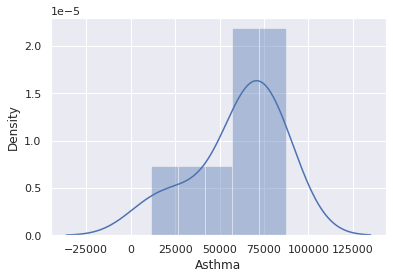

In [29]:
sns.distplot(df_comorbidities_stat['Asthma'])

### Statistical distribution of Cancer in various age group

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



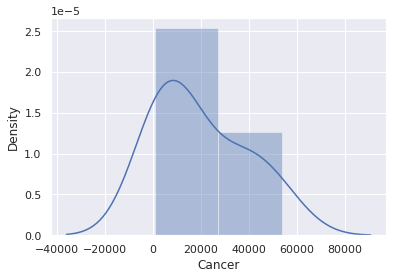

In [30]:
sns.distplot(df_comorbidities_stat['Cancer'])

### Statistical distribution of Diabetes in various age group

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



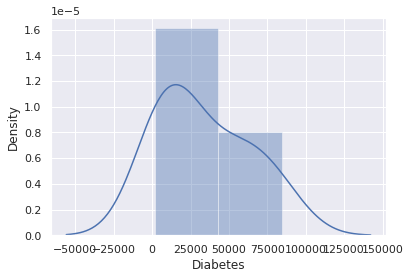

In [31]:
sns.distplot(df_comorbidities_stat['Diabetes'])

### Statistical distribution of Mental-health-condition in various age group

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



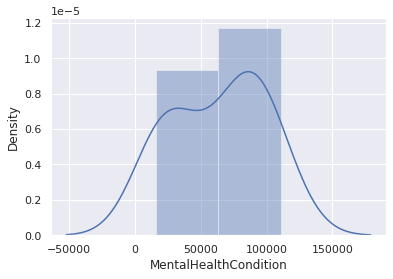

In [32]:
sns.distplot(df_comorbidities_stat['MentalHealthCondition'])

In [33]:
df_comorbidities_stat.columns

Index(['Arthritis', 'Asthma', 'Cancer', 'Dementia', 'Diabetes', 'HeartDisease',
       'KidneyDisease', 'LungCondition', 'MentalHealthCondition', 'Stroke',
       'otherLongTermHealthCond', 'NoLongTermHealthCond', 'NotStated',
       'Age-Total'],
      dtype='object')

### Statistical distribution of Kidney-Disease in various age group

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



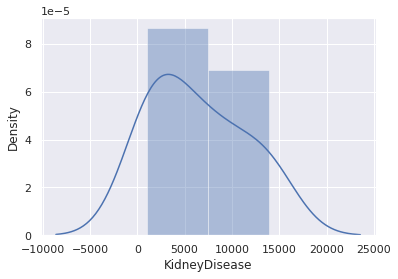

In [34]:
sns.distplot(df_comorbidities_stat['KidneyDisease'])

## Identify imbalance in Comorbidities 



In [35]:
df.head(3)

,Total,Male-Total,M_0-14,M_15-24,M_25-34,M_35-44,M_45-54,M_55-64,M_65-74,M_75-84,...,Female-total,F_0-14,F_15-24,F_25-34,F_35-44,F_45-54,F_55-64,F_65-74,F_75-84,F_85
Comorbidities,,,,,,,,,,,,,,,,,,,,,
Arthritis,518641,183276,410,1255,4859,9836,20218,38927,52812,39517,...,335365,447,2041,6777,14795,35893,69851,94887,73573,37101
Asthma,543047,244002,45210,33478,38793,36650,29228,24778,20611,11553,...,299045,29239,33855,48672,45483,41617,38055,34529,19959,7636
Cancer,179304,85362,618,758,1719,3080,6378,15458,27387,22150,...,93942,478,667,2030,5210,12221,20493,26255,18593,7995


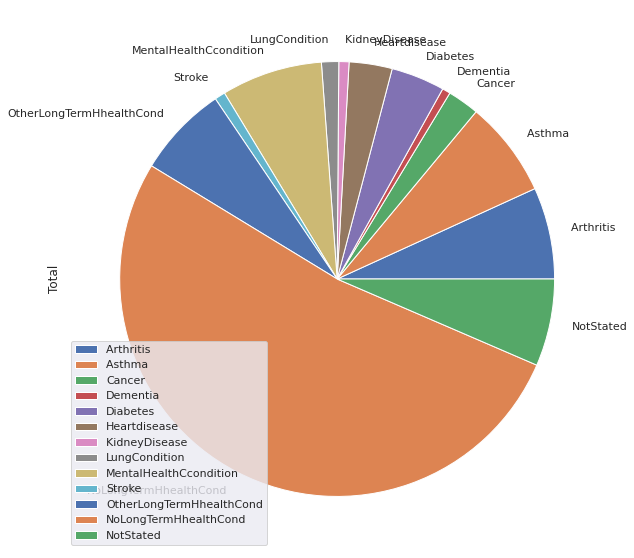

In [36]:

plot = df.plot.pie(y='Total', figsize=(10, 10))

## Identify Age imbalance in Comorbidities

In [37]:
df_comorbidities_stat.columns

Index(['Arthritis', 'Asthma', 'Cancer', 'Dementia', 'Diabetes', 'HeartDisease',
       'KidneyDisease', 'LungCondition', 'MentalHealthCondition', 'Stroke',
       'otherLongTermHealthCond', 'NoLongTermHealthCond', 'NotStated',
       'Age-Total'],
      dtype='object')

In [38]:
df_comorb_age_imb = df_comorbidities_stat.loc[:, ['Asthma', 'Cancer', 'Diabetes','KidneyDisease', 'MentalHealthCondition']]

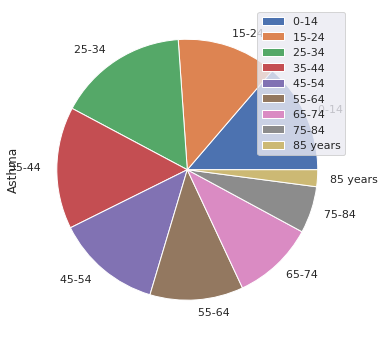

In [39]:
plot = df_comorbidities_stat.loc[:, ['Asthma']].plot.pie(subplots=True, figsize=(11, 6))

### Asthma is shown less in age group greater than 75 yrs

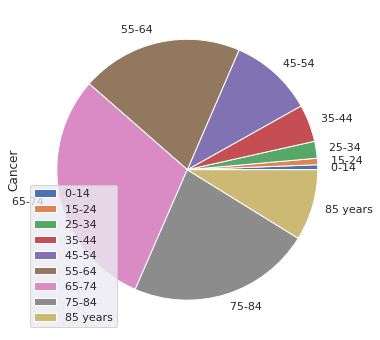

In [40]:
plot = df_comorbidities_stat.loc[:, ['Cancer']].plot.pie(subplots=True, figsize=(11, 6))

### Cancer is shown less in age group less than 35 yrs

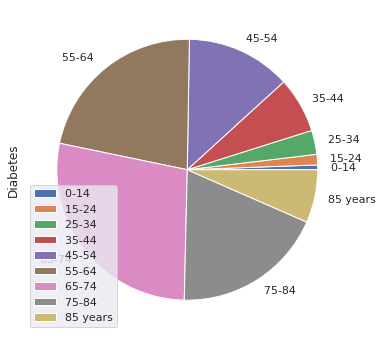

In [41]:
plot = df_comorbidities_stat.loc[:, ['Diabetes']].plot.pie(subplots=True, figsize=(11, 6))

### Diabets is shown less in age group less than 35 yrs

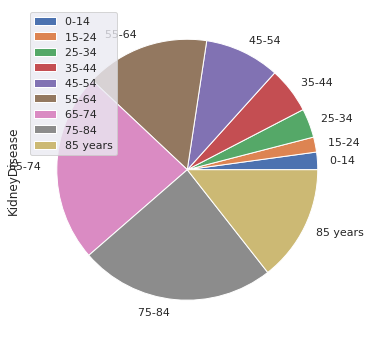

In [42]:
plot = df_comorbidities_stat.loc[:, ['KidneyDisease']].plot.pie(subplots=True, figsize=(11, 6))

### Kidney disease is shown less in age group less than 35 yrs

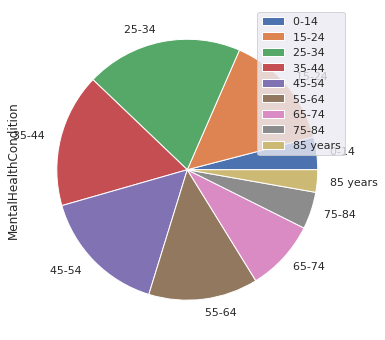

In [43]:
plot = df_comorbidities_stat.loc[:, ['MentalHealthCondition']].plot.pie(subplots=True, figsize=(11, 6))

### Mental Health Condition is shown less in age group less than 14 yrs and at higher age group  75 yrs and above

## Identify Gender imbalance in Comorbidities

In [44]:
df.head(2)

,Total,Male-Total,M_0-14,M_15-24,M_25-34,M_35-44,M_45-54,M_55-64,M_65-74,M_75-84,...,Female-total,F_0-14,F_15-24,F_25-34,F_35-44,F_45-54,F_55-64,F_65-74,F_75-84,F_85
Comorbidities,,,,,,,,,,,,,,,,,,,,,
Arthritis,518641,183276,410,1255,4859,9836,20218,38927,52812,39517,...,335365,447,2041,6777,14795,35893,69851,94887,73573,37101
Asthma,543047,244002,45210,33478,38793,36650,29228,24778,20611,11553,...,299045,29239,33855,48672,45483,41617,38055,34529,19959,7636


In [45]:
#Selecting dataset for gender imbalance
df_gender_imbalance = df.loc[:, ['Male-Total','Female-total']]

In [46]:
df_gender = df_gender_imbalance.transpose()

In [47]:
df_gender.columns

Index(['Arthritis ', 'Asthma ', 'Cancer', 'Dementia', 'Diabetes',
       'Heartdisease', 'KidneyDisease ', 'LungCondition',
       'MentalHealthCcondition', 'Stroke', 'OtherLongTermHhealthCond',
       'NoLongTermHhealthCond', 'NotStated'],
      dtype='object', name='Comorbidities')

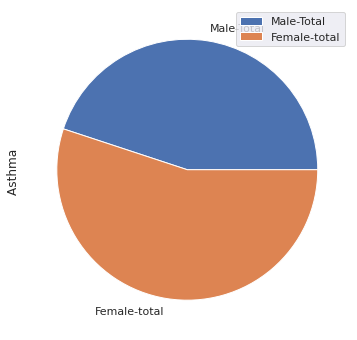

In [48]:
plot = df_gender.loc[:, ['Asthma ']].plot.pie(subplots=True, figsize=(11, 6))

### Asthma is shown less in Males but not imbalanced

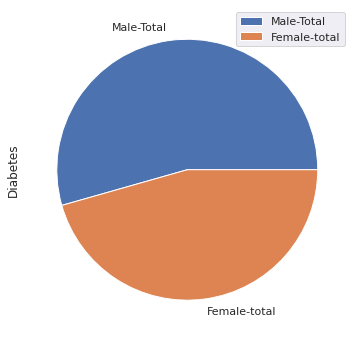

In [49]:
plot = df_gender.loc[:, ['Diabetes']].plot.pie(subplots=True, figsize=(11, 6))

### Diabetes is in equal propotion in Males and Females

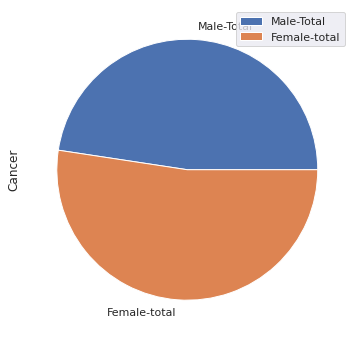

In [50]:
plot = df_gender.loc[:, ['Cancer']].plot.pie(subplots=True, figsize=(11, 6))

### Cancer is in ~equal propotion in Males and Females

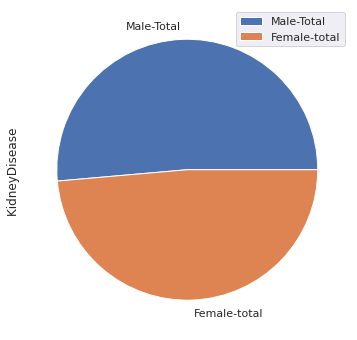

In [51]:
plot = df_gender.loc[:, ['KidneyDisease ']].plot.pie(subplots=True, figsize=(11, 6))

### Kidney Disease is in ~equal propotion in Males and Females

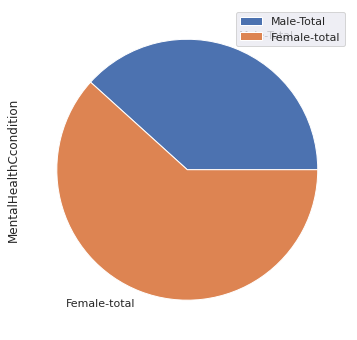

In [52]:
plot = df_gender.loc[:, ['MentalHealthCcondition']].plot.pie(subplots=True, figsize=(11, 6))

### Mental Health Condition is shown more in Femnale population